# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane are more effective at reducing tumor volume in mice than infubinol or ceftamin

- Larger mice have a much higher chance of having a larger tumor

- All the drugs seem to start taking effect after 20 days 

 

In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
research_df = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
research_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [74]:
# Checking the number of mice.
research_df['Mouse ID'].nunique()

249

In [75]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids = research_df[research_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [77]:
# Optional: Get all the data for the duplicate mouse ID. 
research_df[research_df['Mouse ID']==duplicate_ids[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [81]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
research_df = research_df.loc[research_df['Mouse ID'] != duplicate_ids[0]]
research_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [82]:
# Checking the number of mice in the clean DataFrame.
research_df['Mouse ID'].nunique()

248

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor = research_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').mean()
median_tumor = research_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').median()
variance_tumor = research_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').var()
std_tumor = research_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').std()
SEM_tumor = research_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').sem()

summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor['Tumor Volume (mm3)'],
                           "Median Tumor Volume": median_tumor['Tumor Volume (mm3)'],
                           "Tumor Volume Variance": variance_tumor['Tumor Volume (mm3)'],
                           "Tumor Volume Std. Dev.": std_tumor['Tumor Volume (mm3)'],
                           "Tumor Volume Std. Err.": SEM_tumor['Tumor Volume (mm3)']})

summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

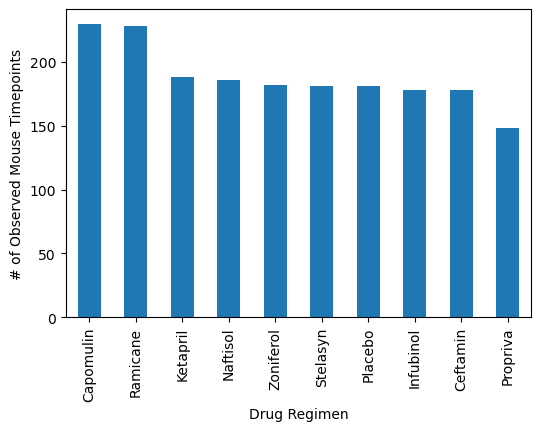

In [103]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
research_df['Drug Regimen'].value_counts().plot(kind='bar', figsize=(6,4), ylabel='# of Observed Mouse Timepoints')

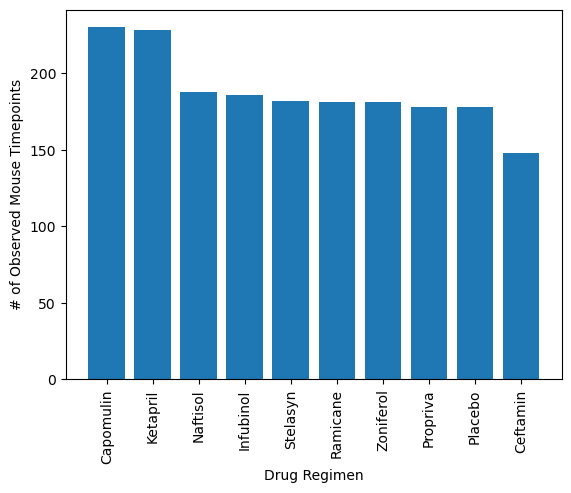

In [108]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(research_df['Drug Regimen'].unique(), research_df['Drug Regimen'].value_counts())
plt.xlabel("Drug Regimen")
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()

<Axes: ylabel='count'>

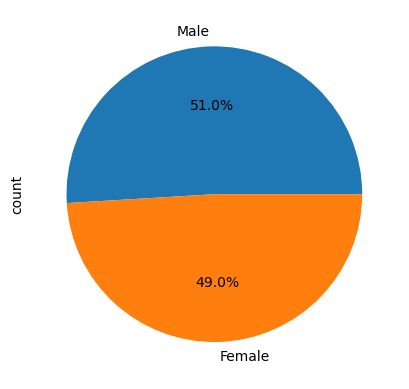

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
research_df["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%")

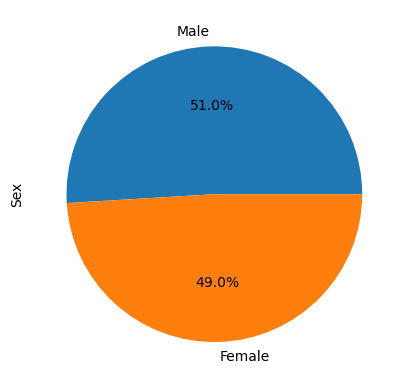

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
plt.pie(research_df["Sex"].value_counts(), labels=labels,autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [125]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = research_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_time, research_df, on = ["Mouse ID", "Timepoint"], how = "left")

In [123]:
x = []

In [131]:
x = merged_data.loc[merged_data["Drug Regimen"] == 'Capomulin', "Tumor Volume (mm3)"]
x.values

array([38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203 ,
       47.68596303, 37.31184577, 38.1251644 , 38.75326548, 41.48300765,
       38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684,
       41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294,
       40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384 ])

In [140]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    row = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(row.values)
    
    # Determine outliers using upper and lower bounds
    quartiles = row.quantile([.25,.5,.75])
    lower_quar = quartiles[0.25]
    upper_quar = quartiles[0.75]
    iqr = upper_quar - lower_quar
    lower_bound = lower_quar - (1.5 * iqr)
    upper_bound = upper_quar + (1.5 * iqr)
    outliers = [i for i in row if (i > upper_bound) | (i < lower_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


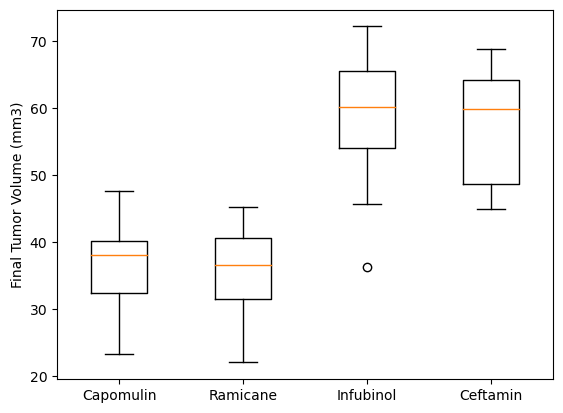

In [146]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatment_regimens)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

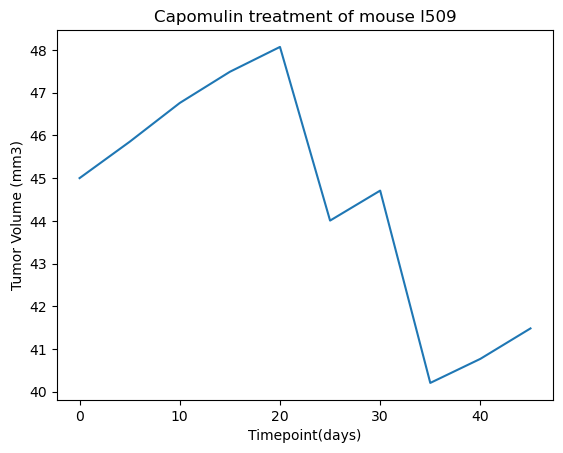

In [147]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot_data = research_df[research_df['Mouse ID']=='l509']
plt.plot(line_plot_data['Timepoint'],line_plot_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

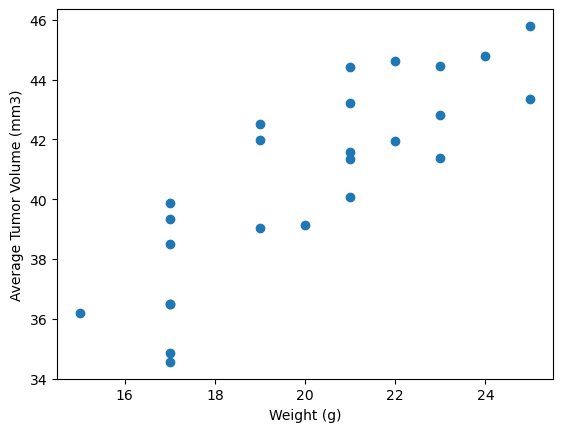

In [150]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = research_df[research_df["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(weight, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


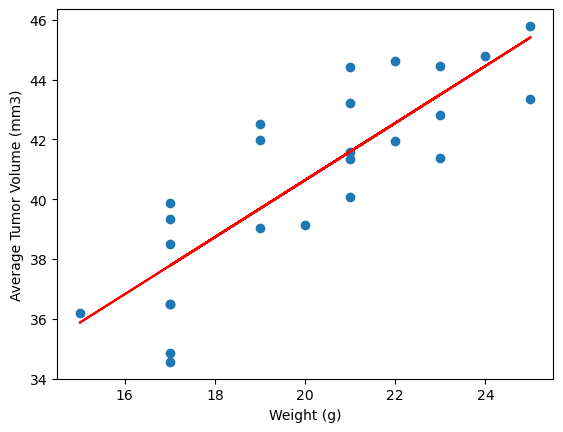

In [160]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cor = st.pearsonr(weight,average_tumor_volume)
print(f'The correlation between mouse weight and the average tumor volume is {cor[0]:.2f}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, average_tumor_volume)
regress_values = weight * slope + intercept

plt.scatter(weight, average_tumor_volume)
plt.plot(weight, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()